## 내사랑 <font color="royalblue">MT</font>와 함께 하는 _아이스크림_ 분석 <3

### import module

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib
from matplotlib import font_manager, rc
import platform

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

### import data

#### 주사용 데이터_nice 영수증 단위 데이터 (icecream 데이터라고 하자!)

In [3]:
total = pd.read_csv('data/icecream.csv')
total.head()

,receipt_no,item_nm,class_nm1,corp_nm,sale_qty,sale_amt,tran_dy,time
0,268,빵또아,아이스크림,빙그레,1,1500,20180701,0
1,407,비락수정과,음료,팔도,1,1000,20180701,8
2,407,비락수정과,음료,팔도,1,1000,20180701,8
3,407,메로나,아이스크림,빙그레,3,3000,20180701,8
4,514,폴라포포도,아이스크림,해태,1,1086,20180701,4


#### 함께 사용해보자_nice 품목별 소비 데이터

In [4]:
item = pd.read_csv('data/item.csv')
item.head()

,ADMI2,ATTRCODE,TRAN_DY,TRAN_H,CATCODE,SALE_QTY,SALE_AMT,TRAN_CNT
0,11,A,20170101,1,1,77,101900,44
1,11,A,20170101,1,2,29,40000,22
2,11,A,20170101,1,3,43,52730,27
3,11,A,20170101,1,5,18,26500,11
4,11,A,20170101,1,6,48,56450,40


### icecream data를 살펴보자 !

#### class_nm1 (품목)들 중 어떤 것이 인기가 많을까?

In [5]:
items = [] # 품목 담을 list
total_len = [] # 품목 당 거래 행 담은 list
total_amt = [] # 품목 당 판매 금액 list
for group, frame in total.groupby('class_nm1'):
    items.append(group)
    total_len.append(len(frame))
    total_amt.append(sum(frame['sale_amt']))

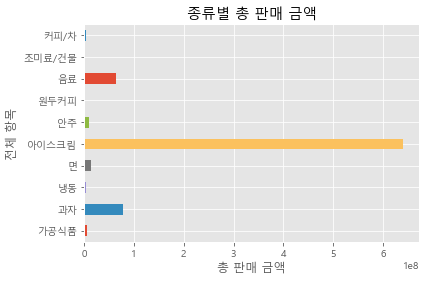

In [6]:
plt.style.use('ggplot')

total.groupby('class_nm1')['sale_amt'].sum().plot(kind='barh')
plt.title('종류별 총 판매 금액')
plt.ylabel('전체 항목')
plt.xlabel('총 판매 금액')
plt.savefig('graph/종류별 총 판매 금액.png')

- 아이스크림이 너무 압도적으로 많잖아?
- 그렇다면, 아이스크림을 제외하고 한번 그래프를 그려보자!

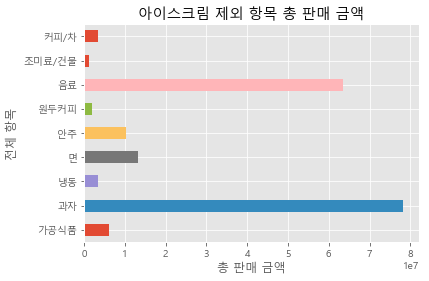

In [7]:
rest = total[total['class_nm1']!='아이스크림']
rest.groupby('class_nm1')['sale_amt'].sum().plot(kind='barh')
plt.title('아이스크림 제외 항목 총 판매 금액')
plt.ylabel('전체 항목')
plt.xlabel('총 판매 금액')
plt.savefig('graph/아이스크림 제외 총 판매 금액.png')

- 음료랑 과자가 아이스크림 다음으로 많네?
- 이건 나중에 분석할 때 고려해보자 !

### 그렇다면, 일단 가장 많은 아이스크림 데이터부터 분석해보자!

### icecream 관련 data 따로 뽑아내기

In [8]:
icecream = total[total['class_nm1']=='아이스크림']
icecream.head()

,receipt_no,item_nm,class_nm1,corp_nm,sale_qty,sale_amt,tran_dy,time
0,268,빵또아,아이스크림,빙그레,1,1500,20180701,0
3,407,메로나,아이스크림,빙그레,3,3000,20180701,8
4,514,폴라포포도,아이스크림,해태,1,1086,20180701,4
5,514,끼리크림치즈바,아이스크림,빙그레,1,1814,20180701,4
6,628,벨기에초코바,아이스크림,라베스트,1,2000,20180701,2


In [9]:
print(len(icecream) / len(total))
print(len(icecream))

0.7669887184062548
326672


#### 결측치 확인

In [10]:
icecream.isna().sum()

receipt_no    0
item_nm       0
class_nm1     0
corp_nm       0
sale_qty      0
sale_amt      0
tran_dy       0
time          0
dtype: int64

- 역시나 결측치가 없네 !

### 아이스크림 brand별 판매량을 알아보자!

In [11]:
len(icecream['corp_nm'].unique())

25

- 브랜드는 총 25개가 있다 !

In [12]:
total_qty = icecream.groupby(['corp_nm'])['sale_qty'].sum()
total_qty

corp_nm
DOLE        2908
L-GOLD      7103
MQ             3
PB         16375
끌레도르        5430
나뚜루         4024
델스             3
동그린        12797
동원          3039
동학           694
디핀         16129
라베스트        3787
라벨리          734
로투스         6683
롯데        106075
롯데푸드       66380
본젤라또        5143
빙그레       112051
서주          1791
에버         20073
유니          2414
제스          2318
파이         14272
하겐         14476
해태         75242
Name: sale_qty, dtype: int64

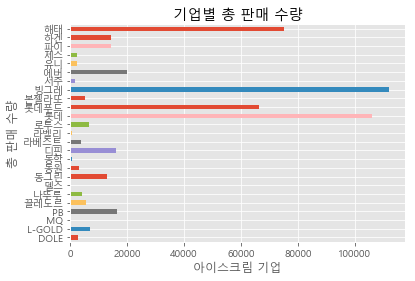

In [13]:
total_qty.plot(kind='barh')
plt.title('기업별 총 판매 수량')
plt.xlabel("아이스크림 기업")
plt.ylabel("총 판매 수량")
plt.savefig('graph/기업별 총 판매수량2.png')
plt.show()

In [14]:
total_amt = icecream.groupby(['corp_nm'])['sale_amt'].sum()
total_amt

corp_nm
DOLE        3581214
L-GOLD      5640391
MQ            20004
PB         19962553
끌레도르        8544742
나뚜루        19341917
델스             4500
동그린        11512767
동원          4211179
동학          1036800
디핀         35731568
라베스트        6366734
라벨리         1095280
로투스        11259031
롯데        113246871
롯데푸드       71553255
본젤라또        7496567
빙그레       110068415
서주          1334166
에버         34621717
유니          6140891
제스          4096126
파이         18954746
하겐         68825885
해태         76023921
Name: sale_amt, dtype: int64

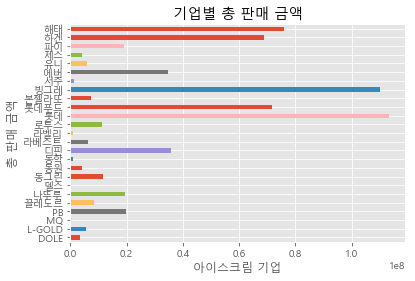

In [15]:
total_amt.plot(kind='barh')
plt.title('기업별 총 판매 금액')
plt.xlabel("아이스크림 기업")
plt.ylabel("총 판매 금액")
plt.savefig('graph/기업별 총 판매금액2.png')
plt.show()

#### 빙그레/롯데/롯데푸드/해태 네가지 기업이 수량 및 금액 측면 모두에서 우위

- 하겐은 금액 측면에서는 우위를 가지지만 수량 측면에서는 우위를 가지지 않음

### 큰손 네 기업별 데이터 뽑아내자!

In [16]:
lotte = icecream[icecream['corp_nm']=='롯데']
bingle = icecream[icecream['corp_nm']=='빙그레']
lottefood = icecream[icecream['corp_nm']=='롯데푸드']
haetae = icecream[icecream['corp_nm']=='해태']

#### 큰손 기업별 총 판매수량 및 금액 데이터

In [17]:
lotte_qty = lotte.groupby(lotte['item_nm'])['sale_qty'].sum()
bingle_qty = bingle.groupby(bingle['item_nm'])['sale_qty'].sum()
lottefood_qty = lottefood.groupby(lottefood['item_nm'])['sale_qty'].sum()
haetae_qty = haetae.groupby(haetae['item_nm'])['sale_qty'].sum()

lotte_amt = lotte.groupby(lotte['item_nm'])['sale_amt'].sum()
bingle_amt = bingle.groupby(bingle['item_nm'])['sale_amt'].sum()
lottefood_amt = lottefood.groupby(lottefood['item_nm'])['sale_amt'].sum()
haetae_amt = haetae.groupby(haetae['item_nm'])['sale_amt'].sum()

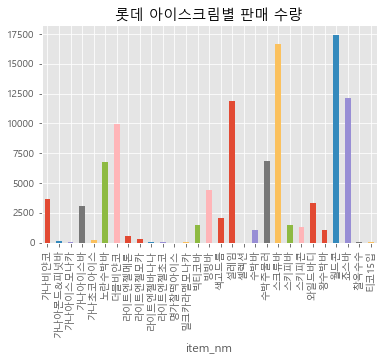

In [18]:
lotte_qty.plot(kind='bar')
plt.title("롯데 아이스크림별 판매 수량")
plt.savefig('graph/롯데 판매수량.png')
plt.show()

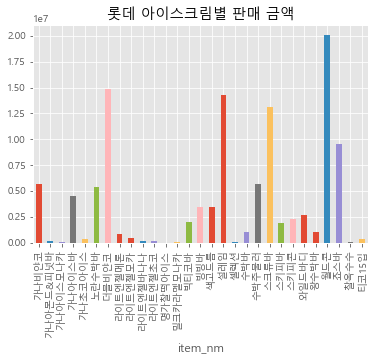

In [19]:
lotte_amt.plot(kind='bar')
plt.title("롯데 아이스크림별 판매 금액")
plt.savefig('graph/롯데 판매금액.png')
plt.show()

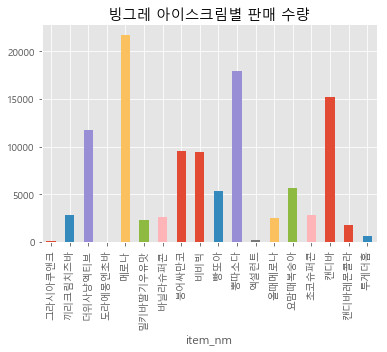

In [20]:
bingle_qty.plot(kind='bar')
plt.title("빙그레 아이스크림별 판매 수량")
plt.savefig('graph/빙그레 판매수량.png')
plt.show()

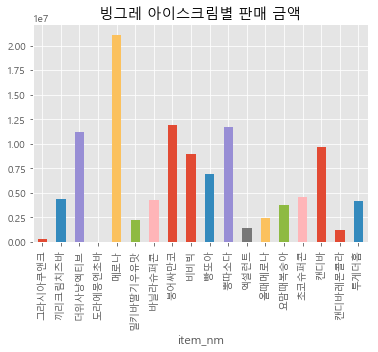

In [21]:
bingle_amt.plot(kind='bar')
plt.title("빙그레 아이스크림별 판매 금액")
plt.savefig('graph/빙그레 판매금액.png')
plt.show()

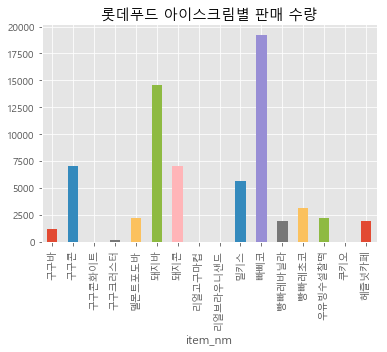

In [22]:
lottefood_qty.plot(kind='bar')
plt.title("롯데푸드 아이스크림별 판매 수량")
plt.savefig('graph/롯데푸드 판매수량.png')
plt.show()

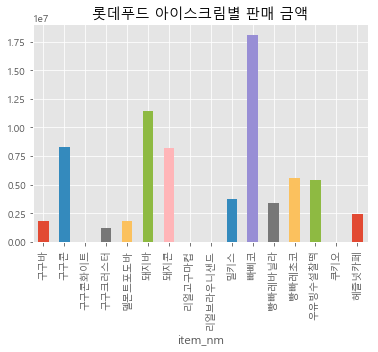

In [23]:
lottefood_amt.plot(kind='bar')
plt.title("롯데푸드 아이스크림별 판매 금액")
plt.savefig('graph/롯데푸드 판매금액.png')
plt.show()

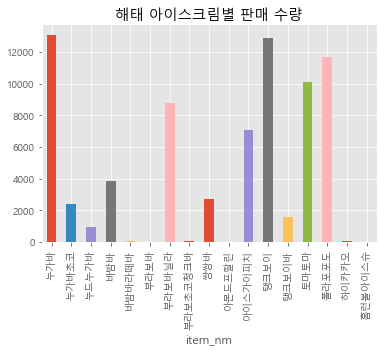

In [24]:
haetae_qty.plot(kind='bar')
plt.title("해태 아이스크림별 판매 수량")
plt.savefig('graph/해태 판매수량.png')
plt.show()

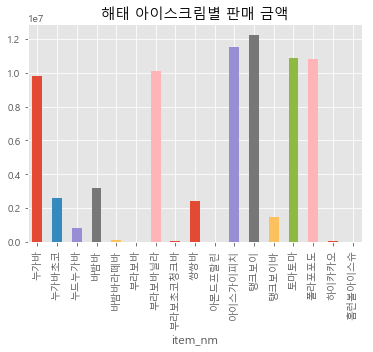

In [25]:
haetae_amt.plot(kind='bar')
plt.title("해태 아이스크림별 판매 금액")
plt.savefig('graph/롯데 해태금액.png')
plt.show()

#### 각 아이스크림 기업 별 아이스크림 종류를 알아보자!

In [26]:
ice_dic = {}
brands = list(icecream['corp_nm'].unique())
for brand in brands:
    brand_df = icecream[icecream['corp_nm']==brand]
    ice_name = brand_df['item_nm'].unique()
    ice_dic[brand] = ice_name
ice_dic

{'빙그레': array(['빵또아', '메로나', '끼리크림치즈바', '붕어싸만코', '비비빅', '더위사냥엑티브', '뽕따소다', '투게더홈',
        '캔디바', '올때메로나', '요맘때복숭아', '밀키바딸기우유맛', '캔디바레몬콜라', '초코슈퍼콘', '바닐라슈퍼콘',
        '엑설런트', '그라시아쿠앤크', '도라에몽엔초바'], dtype=object),
 '해태': array(['폴라포포도', '부라보바닐라', '토마토마', '탱크보이', '아이스가이피치', '부라보초코청크바', '바밤바',
        '누가바', '쌍쌍바', '누드누가바', '누가바초코', '탱크보이바', '하이카카오', '바밤바라떼바',
        '홈런볼아이스슈', '부라보바', '아몬드프랄린'], dtype=object),
 '라베스트': array(['벨기에초코바', '쿠키크림치즈바'], dtype=object),
 '롯데푸드': array(['빠삐코', '돼지콘', '우유빙수설찰떡', '돼지바', '구구콘', '빵빠레바닐라', '델몬트포도바', '헤즐넛카페',
        '빵빠레초코', '밀키스', '구구바', '구구크러스터', '리얼고구마컵', '쿠키오', '구구콘화이트',
        '리얼브라우니샌드'], dtype=object),
 '나뚜루': array(['딸기컵', '아포가또파인트', '초코컵', '녹차컵', '제주녹차쿠키바', '초코파인트', '녹차파인트', '녹차바',
        '트리플치즈쿠키컵', '초코브라우니파인트', '치즈화이트쿠키바', '딸기초코바', '딸기파인트', '바닐라초코아몬드바',
        '바닐라아몬드컵', '썬리치케익', '리치더블치즈파인트', '치즈베리파인트', '딸기치즈케익파인트',
        'DIY공룡마을케이크', '골드키위파인트', '허니녹차파인트'], dtype=object),
 '끌레도르': array(['쿠앤크바', '바닐라바'], dtype=object),
 '롯데': array([

### 아이스크림 항목 당 판매 수량 및 금액 알아보자!

In [27]:
large_amt = total.groupby('item_nm')['sale_amt'].sum().nlargest(5)
large_amt

item_nm
로투스콘     22518062
메로나      21112724
월드콘      20040644
빠삐코      18105499
더블비얀코    14848326
Name: sale_amt, dtype: int64

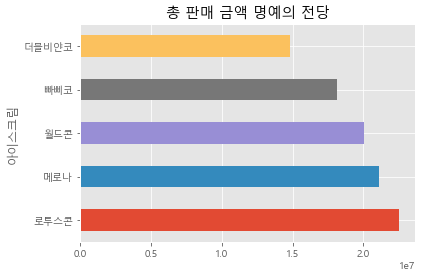

In [28]:
large_amt.plot(kind='barh')
plt.title("총 판매 금액 명예의 전당")
plt.ylabel("아이스크림")
plt.savefig('graph/아이스크림 명예의전당_금액.png')
plt.show()

In [29]:
large_qty = total.groupby('item_nm')['sale_qty'].sum().nlargest(5)
large_qty

item_nm
메로나     21741
빠삐코     19243
뽕따소다    17978
월드콘     17382
스크류바    16677
Name: sale_qty, dtype: int64

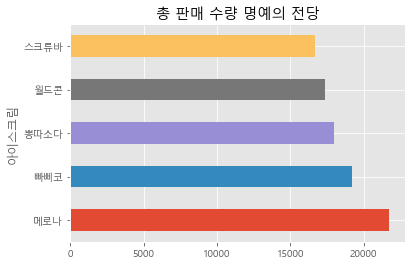

In [30]:
large_qty.plot(kind='barh')
plt.title("총 판매 수량 명예의 전당")
plt.ylabel("아이스크림")
plt.savefig('graph/아이스크림 명예의전당_수량.png')
plt.show()

### 시간대에 따른 아이스크림 데이터 알아보기!

In [31]:
night_ice = icecream[((0 <= icecream['time']) & (icecream['time']<= 6)) | ((22 <= icecream['time']) & (icecream['time'] <=23))]
day_ice = icecream[((10 <= icecream['time']) & (icecream['time']<= 18))]

In [32]:
best_night_qty = night_ice.groupby('item_nm')['sale_qty'].sum().nlargest(10)
best_night_qty

item_nm
메로나     8554
스크류바    6065
탱크보이    5635
빠삐코     5454
뽕따소다    4916
토마토마    4683
캔디바     4662
돼지바     4600
로투스콘    4060
죠스바     3942
Name: sale_qty, dtype: int64

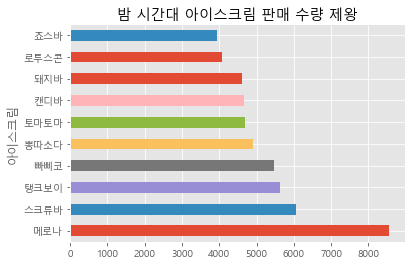

In [33]:
best_night_qty.plot(kind='barh')
plt.ylabel('아이스크림')
plt.title('밤 시간대 아이스크림 판매 수량 제왕')
plt.savefig('graph/저녁 수량 명예전당.png')
plt.show()

In [34]:
night_ice_amt = night_ice.groupby('item_nm')['sale_amt'].sum().nlargest(10)
night_ice_amt

item_nm
메로나      8473369
로투스콘     7076514
탱크보이     5429935
빠삐코      5224742
토마토마     5071671
스크류바     4909476
허쉬콘      4751791
월드콘      4108319
더블비얀코    3952386
허쉬바      3937613
Name: sale_amt, dtype: int64

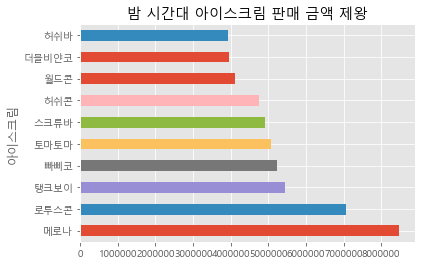

In [35]:
night_ice_amt.plot(kind='barh')
plt.ylabel('아이스크림')
plt.title('밤 시간대 아이스크림 판매 금액 제왕')
plt.savefig('graph/저녁 금액 명예전당.png')
plt.show()

In [36]:
day_ice_qty = day_ice.groupby('item_nm')['sale_qty'].sum().nlargest(10)
day_ice_qty

item_nm
월드콘     9919
빠삐코     9470
뽕따소다    8913
메로나     8374
캔디바     6771
누가바     6632
스크류바    6469
돼지바     6414
설레임     6320
로투스콘    6248
Name: sale_qty, dtype: int64

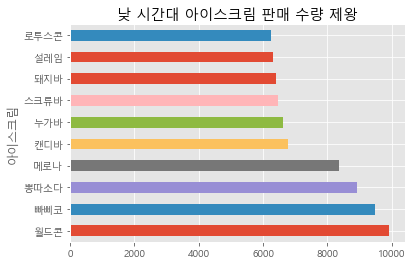

In [37]:
day_ice_qty.plot(kind='barh')
plt.ylabel('아이스크림')
plt.title('낮 시간대 아이스크림 판매 수량 제왕')
plt.savefig('graph/낮 수량 명예전당.png')
plt.show()

In [38]:
day_ice_amt = day_ice.groupby('item_nm')['sale_amt'].sum().nlargest(10)
day_ice_amt

item_nm
월드콘        11373310
로투스콘       10300768
빠삐코         8815769
메로나         7949132
설레임         7599815
더블비얀코       7393123
아이스가이피치     7169180
붕어싸만코       6750708
허쉬콘         6080647
뽕따소다        5817685
Name: sale_amt, dtype: int64

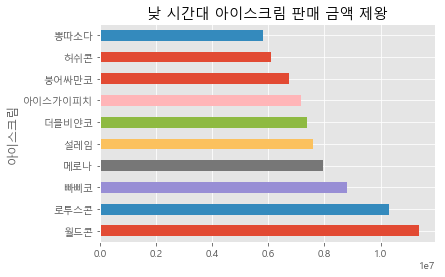

In [39]:
day_ice_amt.plot(kind='barh')
plt.ylabel('아이스크림')
plt.title('낮 시간대 아이스크림 판매 금액 제왕')
plt.savefig('graph/낮 금액 명예전당.png')
plt.show()

### 밤에만 잘팔리고, 낮에만 잘팔리는 아이스크림이 있을까?

- 비율을 알아보자!

### 그렇다면, 조금 줄이기 위해 icecream 판매개수가 500개 이상인걸 뽑아서 해보자!

In [40]:
ice_count = icecream.groupby('item_nm').sum().sort_values(by='sale_qty',ascending =False)
name_lst = ice_count[ice_count['sale_qty']>500].index

In [41]:
ice500 = pd.DataFrame()
for name in name_lst:
    df1 = icecream[icecream['item_nm']==name]
    ice500 = pd.concat([ice500,df1])

#### 시간대 적용!

In [42]:
night_ice500 = ice500[((0 <= ice500['time']) & (ice500['time'] <= 6)) | ((22 <= ice500['time']) & (ice500['time'] <= 23))]
day_ice500 = ice500[((10 <= ice500['time']) & (ice500['time'] <= 18))]

In [43]:
day_dic = {}
night_dic = {}
for name in name_lst: #name_lst는 500개 넘는 아이스크림 이름 리스트
    total_len = total[total['item_nm']==name]['sale_qty'].sum()
    night_len = night_ice500[night_ice500['item_nm']==name]['sale_qty'].sum()
    day_len = day_ice500[day_ice500['item_nm']==name]['sale_qty'].sum()
    night_prob = night_len / total_len
    day_prob = day_len / total_len
    night_dic[name] = night_prob
    day_dic[name] = day_prob

In [44]:
night_sort = sorted(night_dic.items(), key=lambda x: x[1], reverse=True)

In [45]:
day_sort = sorted(day_dic.items(), key=lambda x: x[1], reverse=True)

### 소비자계의 큰 손도 알아보자! 부자들!

In [46]:
best_no = icecream.groupby("receipt_no")['sale_amt'].sum().nlargest(10)
rich = list(best_no.index)
rich # 앞에 있는 애들부터 부자

[142001, 119030, 126283, 44379, 69049, 56946, 186341, 118827, 28653, 69918]

In [47]:
best_tot = total.groupby("receipt_no")['sale_amt'].sum().nlargest(10)
tot_rich = list(best_tot.index)
tot_rich

[142001, 186341, 185531, 94197, 119030, 179728, 183125, 36859, 36860, 126283]

In [48]:
# 아이스크림 부자들
icerich = pd.DataFrame()
for ppl in rich:
    dfrich = total[total['receipt_no']==ppl]
    icerich = pd.concat([icerich, dfrich])

In [49]:
icerich.groupby('corp_nm')['sale_qty'].sum()

corp_nm
CJ          6
L-GOLD     21
MQ          4
광동          2
나뚜루        57
동서          7
동원          8
롯데         89
롯데푸드       40
매일          1
매크로         4
빙그레        68
예스          2
오뚜기         3
오리온         7
오츠카         5
칠성          9
크라운        13
프로엠         2
하겐        294
해태         86
Name: sale_qty, dtype: int64

In [50]:
totrich = pd.DataFrame()
for ppl in tot_rich:
    dfrich = total[total['receipt_no']==ppl]
    totrich = pd.concat([totrich, dfrich])

In [51]:
totrich.groupby('corp_nm')['sale_qty'].sum()

corp_nm
CJ        8
JN        2
MQ        6
PB        4
광동        9
나뚜루      13
농심       73
동그린       3
동서       16
동아       42
동원       32
디핀        2
롯데       50
롯데푸드     10
매일       15
매크로       4
빙그레      24
에버       45
예스        2
오뚜기       5
오리온      13
오츠카      57
웅진        2
유니        4
일신        4
일화        4
칠성      277
코카       67
크라운      17
프로엠       2
하겐      256
해광        9
해태        9
Name: sale_qty, dtype: int64

- 얘네만 해서 연관성 분석 시켜도 될 것 같지 않나?!

### 음료데이터와 아이스크림 데이터 연관시키기!

### drink data도 뽑아보자!

In [52]:
drink = total[total['class_nm1']=='음료']
drink.head()

,receipt_no,item_nm,class_nm1,corp_nm,sale_qty,sale_amt,tran_dy,time
1,407,비락수정과,음료,팔도,1,1000,20180701,8
2,407,비락수정과,음료,팔도,1,1000,20180701,8
15,1312,꿀물,음료,PB,1,1000,20180701,1
36,2045,박카스F,음료,동아,2,1600,20180702,21
40,2078,레드불에너지,음료,동서,1,2200,20180702,16


### 음료 데이터 중 숙취와 관련된 것도 뽑아보자!

In [53]:
name_list = ['꿀물','여명', '갈아만든배캔', '갈아만든배L','사각사각꿀배', '헛개컨디션', '천지개벽', '갈아만든배(숙취비책)', '컨디션(레이디)', 
'모닝케어','꿀먹은헛개', '모닝케어강황S','모닝파워', '모닝케어(강황)',  '컨디션CEO', '헛개파워', '원비디',
'김과장의비밀', '자연은일 배', '굿모닝', '초코에몽'] # 숙취 관련 음료
#21개

name_useless = []
for i in name_list:
    df1 = drink[drink['item_nm'] == i]
    if len(df1) <= 15:
        name_useless.append(i)

for i in name_useless:
    name_list.remove(i)

name_list

['꿀물',
 '여명',
 '갈아만든배캔',
 '갈아만든배L',
 '사각사각꿀배',
 '헛개컨디션',
 '천지개벽',
 '갈아만든배(숙취비책)',
 '컨디션(레이디)',
 '모닝케어',
 '꿀먹은헛개',
 '모닝케어(강황)',
 '초코에몽']

In [54]:
drinks_hangover = pd.DataFrame()
for name in name_list:
    df1 = drink[drink['item_nm'] == name]
    drinks_hangover = pd.concat([drinks_hangover, df1])
# 음료 데이터만 가지고 한 결과
    
drinks_hangover_no = list(drinks_hangover['receipt_no'])

In [55]:
icecreams_with_drinks_hangover = pd.DataFrame()
for num in drinks_hangover_no:
    step1 = total[total['receipt_no'] == num]
    step2 = step1[step1['class_nm1']=='아이스크림']
    icecreams_with_drinks_hangover = pd.concat(
        [icecreams_with_drinks_hangover, step2])

In [56]:
icecreams_with_drinks_hangover.groupby('item_nm').sum().sort_values(by='sale_qty',ascending =False)['sale_qty'].head()

item_nm
메로나      301
스크류바     176
탱크보이     165
월드콘      121
폴라포포도    110
Name: sale_qty, dtype: int64

### 과자 데이터도 뽑아보자!

In [57]:
snack = total[total['class_nm1']=='과자']
snack.head()

,receipt_no,item_nm,class_nm1,corp_nm,sale_qty,sale_amt,tran_dy,time
8,757,태양의맛썬핫스파이시,과자,오리온,1,1500,20180701,20
9,757,꼬깔콘군옥수수,과자,롯데,1,1500,20180701,20
10,757,꼬북칩스윗시나몬맛,과자,오리온,1,1500,20180701,20
11,757,포스틱,과자,농심,1,1400,20180701,20
12,757,프링글스양파맛,과자,MQ,1,1500,20180701,20


In [58]:
best_snack = snack.groupby('item_nm').sum().sort_values(by='sale_qty',ascending =False)['sale_qty'].head(10)
best_snack

item_nm
요구르트맛젤리G     1053
츄파춥스         1017
새우깡           736
허니버터칩         717
꼬북칩콘스프맛       623
초코홈런볼         578
포카칩오리지널       473
후르츠텔라         442
딸기요구르트젤리G     428
포카칩양파맛        418
Name: sale_qty, dtype: int64

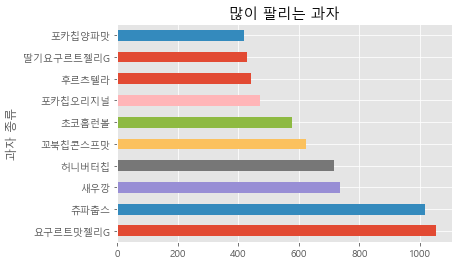

In [59]:
best_snack.plot(kind='barh')
plt.title('많이 팔리는 과자')
plt.ylabel('과자 종류')
plt.savefig('graph/과자.png')
plt.show()

### 시간대별 과자 + 음료 분석

In [60]:
night_snack = snack[((0 <= snack['time']) & (snack['time']<= 6)) | ((22 <= snack['time']) & (snack['time'] <=23))]
day_snack = snack[((10 <= snack['time']) & (snack['time']<= 18))]
night_drink = drink[((0 <= drink['time']) & (drink['time']<= 6)) | ((22 <= drink['time']) & (drink['time'] <=23))]
day_drink = drink[((10 <= drink['time']) & (drink['time']<= 18))]

In [61]:
night_drink_qty = night_drink.groupby('item_nm')['sale_qty'].sum().nlargest(10)
night_drink_amt = night_drink.groupby('item_nm')['sale_amt'].sum().nlargest(10)
day_drink_qty = day_drink.groupby('item_nm')['sale_qty'].sum().nlargest(10)
day_drink_amt = day_drink.groupby('item_nm')['sale_amt'].sum().nlargest(10)

night_snack_qty = night_snack.groupby('item_nm')['sale_qty'].sum().nlargest(10)
night_snack_amt = night_snack.groupby('item_nm')['sale_amt'].sum().nlargest(10)
day_snack_qty = day_snack.groupby('item_nm')['sale_qty'].sum().nlargest(10)
day_snack_amt = day_snack.groupby('item_nm')['sale_amt'].sum().nlargest(10)

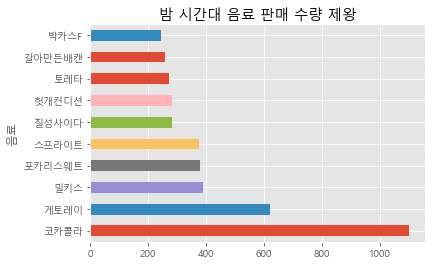

In [62]:
night_drink_qty.plot(kind='barh')
plt.ylabel('음료')
plt.title('밤 시간대 음료 판매 수량 제왕')
plt.savefig('graph/음료 밤 수량 명예전당.png')
plt.show()

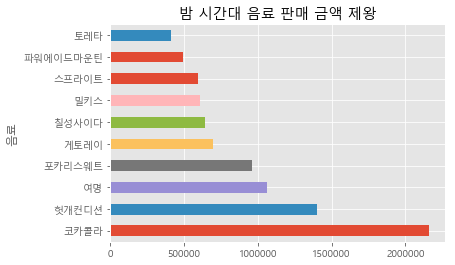

In [63]:
night_drink_amt.plot(kind='barh')
plt.ylabel('음료')
plt.title('밤 시간대 음료 판매 금액 제왕')
plt.savefig('graph/음료 밤 금액 명예전당.png')
plt.show()

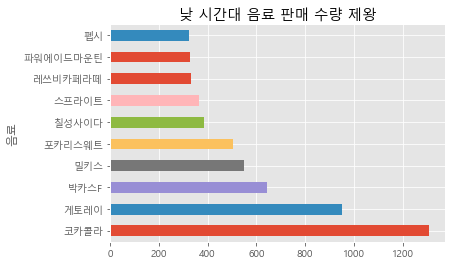

In [64]:
day_drink_qty.plot(kind='barh')
plt.ylabel('음료')
plt.title('낮 시간대 음료 판매 수량 제왕')
plt.savefig('graph/음료 낮 수량 명예전당.png')
plt.show()

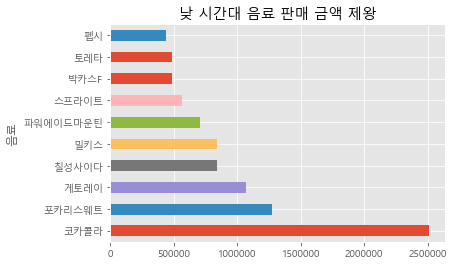

In [65]:
day_drink_amt.plot(kind='barh')
plt.ylabel('음료')
plt.title('낮 시간대 음료 판매 금액 제왕')
plt.savefig('graph/음료 낮 금액 명예전당.png')
plt.show()

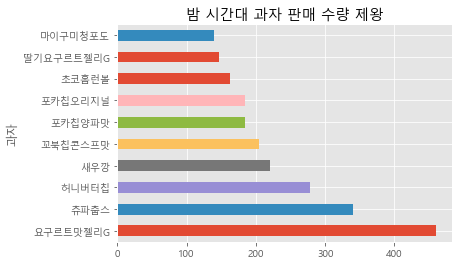

In [66]:
night_snack_qty.plot(kind='barh')
plt.ylabel('과자')
plt.title('밤 시간대 과자 판매 수량 제왕')
plt.savefig('graph/과자 밤 수량 명예전당.png')
plt.show()

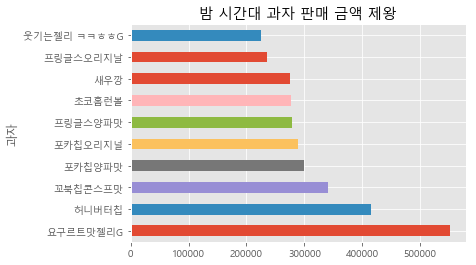

In [67]:
night_snack_amt.plot(kind='barh')
plt.ylabel('과자')
plt.title('밤 시간대 과자 판매 금액 제왕')
plt.savefig('graph/과자 밤 금액 명예전당.png')
plt.show()

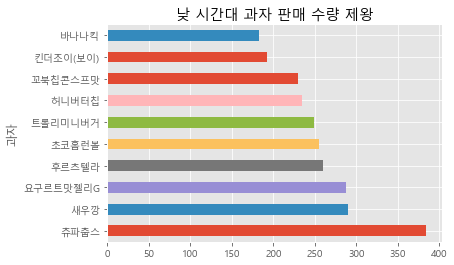

In [68]:
day_snack_qty.plot(kind='barh')
plt.ylabel('과자')
plt.title('낮 시간대 과자 판매 수량 제왕')
plt.savefig('graph/과자 낮 수량 명예전당.png')
plt.show()

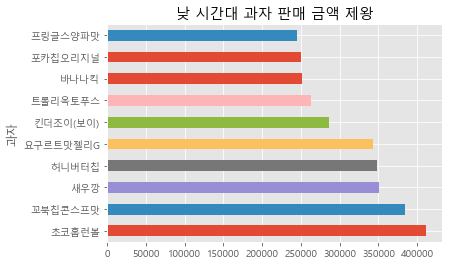

In [69]:
day_snack_amt.plot(kind='barh')
plt.ylabel('과자')
plt.title('낮 시간대 과자 판매 금액 제왕')
plt.savefig('graph/과자 낮 금액 명예전당.png')
plt.show()

### 연관성 분석 (Association Analysis)

#### 연관성 분석 알고리즘 자체는 <font color="red">R</font>에서 진행할 예정

### AA에 알맞게 데이터 처리해보고 저장하자!

### 첫번째 연관성 분석 / 아이스크림 간의 & 아이스크림과 다른 항목 간의 연관성

#### 첫번째 단계 : 일단 icecream만 구매한 사람들의 영수증 번호를 구해보자!

- why? icecream만 구매한 사람들의 영수증 번호를 알아야 나중에 icecream 간의 분석을 할 때는 얘네로, 아니면 다른 애들로 하지 !

In [70]:
ice_idx = []
for group, frame in total.groupby('receipt_no'):
    if len(frame['class_nm1'].unique()) == 1:
        if frame['class_nm1'].unique() == '아이스크림':
            ice_idx.append(group)
            
len(ice_idx) / len(total['receipt_no'].unique())

0.7469451708297905

#### 두번째 단계 : 구한 영수증 번호를 통해서 icecream data에서 구한 영수증 번호 가진 행 index만 도출하자!

- why? index를 도출해야 직접 drop 이용해서 새로운 데이터 구하지 !

In [71]:
only_idx = []
for idx in ice_idx:
    only_idx.extend(total[total['receipt_no']==idx].index)

#### 아이스크림과 다른 상품의 연관성을 고려한 연관성 분석

In [72]:
multi = total.drop(only_idx)
multi.head()

,receipt_no,item_nm,class_nm1,corp_nm,sale_qty,sale_amt,tran_dy,time
1,407,비락수정과,음료,팔도,1,1000,20180701,8
2,407,비락수정과,음료,팔도,1,1000,20180701,8
3,407,메로나,아이스크림,빙그레,3,3000,20180701,8
7,757,부라보바닐라,아이스크림,해태,2,3000,20180701,20
8,757,태양의맛썬핫스파이시,과자,오리온,1,1500,20180701,20


In [73]:
multi.to_csv('data/multi.csv', encoding='euc-kr')

#### 아이스크림 내에서의 연관성 분석

In [74]:
only = total.loc[only_idx,:]
only.head()

,receipt_no,item_nm,class_nm1,corp_nm,sale_qty,sale_amt,tran_dy,time
64993,2,빠삐코,아이스크림,롯데푸드,3,2400,20180701,15
64994,2,가나비얀코,아이스크림,롯데,3,3600,20180701,15
347230,5,구구콘,아이스크림,롯데푸드,1,1500,20180701,0
178024,6,로투스콘,아이스크림,파이,1,2000,20180701,1
178025,6,로투스콘,아이스크림,로투스,1,2000,20180701,1


In [75]:
only.to_csv('data/only.csv', encoding='euc-kr')

### 두번째 연관성 분석 : 밤 시간대 / 낮 시간대 연관성 분석

In [76]:
night_total = total[((0 <= total['time']) & (total['time']<= 6)) | ((22 <= total['time']) & (total['time'] <=23))]
day_total = total[((10 <= total['time']) & (total['time']<= 18))]

In [77]:
night_total.to_csv('data/night.csv', encoding='euc-kr')
day_total.to_csv('data/day.csv', encoding='euc-kr')

### 세번째 연관성 분석 : 부자들 연관성 분석

In [78]:
icerich_idx = []
for idx in rich:
    icerich_idx.extend(total[total['receipt_no']==idx].index)

In [79]:
totrich_idx = []
for idx in tot_rich:
    totrich_idx.extend(total[total['receipt_no']==idx].index)

In [80]:
rich1 = total.loc[icerich_idx,:]
rich1.head()

,receipt_no,item_nm,class_nm1,corp_nm,sale_qty,sale_amt,tran_dy,time
244531,142001,컵딸기,아이스크림,하겐,30,75000,20180814,16
244532,142001,컵녹차,아이스크림,하겐,30,75000,20180814,16
244533,142001,컵벨지안쵸코렛,아이스크림,하겐,30,75000,20180814,16
244534,142001,그린티아몬드바,아이스크림,하겐,20,50000,20180814,16
244535,142001,초콜릿촉아몬드,아이스크림,하겐,15,37500,20180814,16


In [81]:
rich2 = total.loc[totrich_idx,:]
rich2.head()

,receipt_no,item_nm,class_nm1,corp_nm,sale_qty,sale_amt,tran_dy,time
244531,142001,컵딸기,아이스크림,하겐,30,75000,20180814,16
244532,142001,컵녹차,아이스크림,하겐,30,75000,20180814,16
244533,142001,컵벨지안쵸코렛,아이스크림,하겐,30,75000,20180814,16
244534,142001,그린티아몬드바,아이스크림,하겐,20,50000,20180814,16
244535,142001,초콜릿촉아몬드,아이스크림,하겐,15,37500,20180814,16


In [82]:
rich1.to_csv('data/icerich.csv', encoding='euc-kr')
rich2.to_csv('data/totrich.csv', encoding='euc-kr')

### 이제 연관성 분석은 <font color="orange">R</font>에서 하도록 하겠습니다 !